In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
airdf = pd.read_csv('Dataset\Kag_Airbag.csv', index_col=0)

In [3]:
airdf.head()

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
1,25-39,25.069,alive,none,belted,1,f,26,1997,1990.0,unavail,driver,0,3.0,2:3:1
2,10-24,25.069,alive,airbag,belted,1,f,72,1997,1995.0,deploy,driver,1,1.0,2:3:2
3,10-24,32.379,alive,none,none,1,f,69,1997,1988.0,unavail,driver,0,4.0,2:5:1
4,25-39,495.444,alive,airbag,belted,1,f,53,1997,1995.0,deploy,driver,1,1.0,2:10:1
5,25-39,25.069,alive,none,belted,1,f,32,1997,1988.0,unavail,driver,0,3.0,2:11:1


In [4]:
airdf.tail()

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
26213,25-39,3179.688,alive,none,belted,1,m,17,2002,1985.0,unavail,driver,0,0.0,82:107:1
26214,10-24,71.228,alive,airbag,belted,1,m,54,2002,2002.0,nodeploy,driver,0,2.0,82:108:2
26215,10-24,10.474,alive,airbag,belted,1,f,27,2002,1990.0,deploy,driver,1,3.0,82:110:1
26216,25-39,10.474,alive,airbag,belted,1,f,18,2002,1999.0,deploy,driver,1,0.0,82:110:2
26217,25-39,10.474,alive,airbag,belted,1,m,17,2002,1999.0,deploy,pass,1,0.0,82:110:2


In [5]:
airdf.shape

(26217, 15)

In [6]:
airdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26217 entries, 1 to 26217
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dvcat        26217 non-null  object 
 1   weight       26217 non-null  float64
 2   dead         26217 non-null  object 
 3   airbag       26217 non-null  object 
 4   seatbelt     26217 non-null  object 
 5   frontal      26217 non-null  int64  
 6   sex          26217 non-null  object 
 7   ageOFocc     26217 non-null  int64  
 8   yearacc      26217 non-null  int64  
 9   yearVeh      26216 non-null  float64
 10  abcat        26217 non-null  object 
 11  occRole      26217 non-null  object 
 12  deploy       26217 non-null  int64  
 13  injSeverity  26064 non-null  float64
 14  caseid       26217 non-null  object 
dtypes: float64(3), int64(4), object(8)
memory usage: 3.2+ MB


In [7]:
airdf.columns

Index(['dvcat', 'weight', 'dead', 'airbag', 'seatbelt', 'frontal', 'sex',
       'ageOFocc', 'yearacc', 'yearVeh', 'abcat', 'occRole', 'deploy',
       'injSeverity', 'caseid'],
      dtype='object')

In [8]:
airdf.drop(['weight','caseid','deploy'], axis = 1, inplace = True)

In [9]:
airdf.columns

Index(['dvcat', 'dead', 'airbag', 'seatbelt', 'frontal', 'sex', 'ageOFocc',
       'yearacc', 'yearVeh', 'abcat', 'occRole', 'injSeverity'],
      dtype='object')

In [10]:
airdf.rename(columns={'dvcat' : 'impact_speed', 'abcat':'airbag_deploy', 'yearacc' : 'accident_year', 'occRole' : 'occupant', 'yearVeh' : 'vehicle_year', 'ageOFocc' : 'occupant_age', 'injSeverity' : 'injury_level'}, inplace = True)

In [11]:
airdf.head(15)

,impact_speed,dead,airbag,seatbelt,frontal,sex,occupant_age,accident_year,vehicle_year,airbag_deploy,occupant,injury_level
1,25-39,alive,none,belted,1,f,26,1997,1990.0,unavail,driver,3.0
2,10-24,alive,airbag,belted,1,f,72,1997,1995.0,deploy,driver,1.0
3,10-24,alive,none,none,1,f,69,1997,1988.0,unavail,driver,4.0
4,25-39,alive,airbag,belted,1,f,53,1997,1995.0,deploy,driver,1.0
5,25-39,alive,none,belted,1,f,32,1997,1988.0,unavail,driver,3.0
6,40-54,alive,none,belted,1,f,22,1997,1985.0,unavail,driver,3.0
7,55+,alive,none,belted,1,m,22,1997,1984.0,unavail,driver,3.0
8,55+,dead,none,none,1,m,32,1997,1987.0,unavail,driver,4.0
9,10-24,alive,none,belted,0,m,40,1997,1984.0,unavail,driver,1.0
10,10-24,alive,none,belted,1,f,18,1997,1987.0,unavail,driver,0.0


# To check missing values :

In [12]:
airdf.isnull().sum()

impact_speed       0
dead               0
airbag             0
seatbelt           0
frontal            0
sex                0
occupant_age       0
accident_year      0
vehicle_year       1
airbag_deploy      0
occupant           0
injury_level     153
dtype: int64

# Checking the columns with null values: 

In [13]:
airdf[airdf['vehicle_year'].isnull() == True]

,impact_speed,dead,airbag,seatbelt,frontal,sex,occupant_age,accident_year,vehicle_year,airbag_deploy,occupant,injury_level
1148,10-24,alive,airbag,belted,1,m,27,1997,NaN,deploy,driver,0.0


In [14]:
# Replacing null value with the mean of vehicle year column

airdf['vehicle_year'].fillna(airdf['vehicle_year'].mean())

1        1990.0
2        1995.0
3        1988.0
4        1995.0
5        1988.0
          ...  
26213    1985.0
26214    2002.0
26215    1990.0
26216    1999.0
26217    1999.0
Name: vehicle_year, Length: 26217, dtype: float64

In [15]:
airdf[airdf['injury_level'].isnull() == True]

,impact_speed,dead,airbag,seatbelt,frontal,sex,occupant_age,accident_year,vehicle_year,airbag_deploy,occupant,injury_level
639,10-24,alive,none,belted,0,f,36,1997,1984.0,unavail,driver,NaN
863,25-39,alive,none,none,1,m,22,1997,1993.0,unavail,driver,NaN
1208,10-24,alive,none,belted,0,f,80,1997,1981.0,unavail,pass,NaN
1254,10-24,alive,none,belted,0,f,27,1997,1984.0,unavail,pass,NaN
1342,10-24,alive,airbag,belted,1,m,23,1997,1995.0,deploy,driver,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
25461,10-24,alive,airbag,belted,1,m,25,2002,1999.0,deploy,pass,NaN
25465,10-24,alive,airbag,belted,1,m,22,2002,1999.0,nodeploy,pass,NaN
25981,10-24,alive,none,belted,1,f,17,2002,1987.0,unavail,pass,NaN
26043,25-39,alive,airbag,belted,1,f,59,2002,1999.0,nodeploy,pass,NaN


In [16]:
airdf['injury_level'].dropna()

1        3.0
2        1.0
3        4.0
4        1.0
5        3.0
        ... 
26213    0.0
26214    2.0
26215    3.0
26216    0.0
26217    0.0
Name: injury_level, Length: 26064, dtype: float64

In [17]:
airdf['airbag_deploy'].value_counts()

unavail     11798
deploy       8836
nodeploy     5583
Name: airbag_deploy, dtype: int64

# Checking duplicate rows :

In [18]:
airdf.duplicated().any()

True

In [19]:
airdf.duplicated().sum()

594

# Displaying duplicate rows :

In [20]:
airdf[airdf.duplicated()]

,impact_speed,dead,airbag,seatbelt,frontal,sex,occupant_age,accident_year,vehicle_year,airbag_deploy,occupant,injury_level
275,25-39,alive,none,belted,0,f,17,1997,1989.0,unavail,driver,3.0
318,55+,alive,none,none,1,m,20,1997,1981.0,unavail,driver,3.0
554,10-24,alive,airbag,none,1,m,28,1997,1994.0,nodeploy,driver,3.0
569,10-24,alive,none,none,1,m,26,1997,1986.0,unavail,driver,0.0
715,10-24,alive,none,belted,1,m,35,1997,1991.0,unavail,driver,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
26118,25-39,alive,airbag,belted,1,f,21,2002,1999.0,deploy,driver,1.0
26135,10-24,alive,none,none,1,m,18,2002,1993.0,unavail,pass,2.0
26155,40-54,alive,airbag,belted,1,m,35,2002,2001.0,deploy,driver,2.0
26189,25-39,alive,none,none,1,m,44,2002,1988.0,unavail,driver,2.0


# Dropping duplicated rows :

In [21]:
airdf.drop_duplicates(inplace=True)

In [22]:
airdf.shape

(25623, 12)

# Summary Statistics for numeric values :

In [23]:
 airdf.describe()

,frontal,occupant_age,accident_year,vehicle_year,injury_level
count,25623.000000,25623.000000,25623.000000,25622.000000,25470.000000
mean,0.639582,37.375756,1999.554033,1992.770080,1.726620
std,0.480131,17.972731,1.701966,5.607968,1.292562
min,0.000000,16.000000,1997.000000,1953.000000,0.000000
25%,0.000000,22.000000,1998.000000,1989.000000,1.000000
50%,1.000000,33.000000,2000.000000,1994.000000,2.000000
75%,1.000000,48.000000,2001.000000,1997.000000,3.000000
max,1.000000,97.000000,2002.000000,2003.000000,6.000000


## Key Observations : 

### Average year of accident is 1999 in the dataset.
### Average age of occupant in the vehicle is 37 years with minimum age being 16 and maximum age being 97 years.
### Minimum year of vehicle is 1953 , while maximum is 2003. Average year is 1992

# Summary statistics for object datatype : 

In [24]:
airdf.describe(include=['O'])

,impact_speed,dead,airbag,seatbelt,sex,airbag_deploy,occupant
count,25623,25623,25623,25623,25623,25623,25623
unique,5,2,2,2,2,3,2
top,10-24,alive,airbag,belted,m,unavail,driver
freq,12452,24443,14049,18058,13638,11574,20063


In [25]:
airdf['occupant'].unique()

array(['driver', 'pass'], dtype=object)

### There are two unique values in vehicle occupant role : Driver and Passenger
### Top category is driver


# Count of Unique values of Injury Severity :

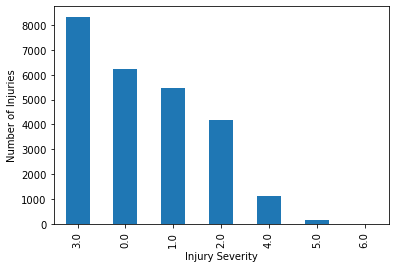

In [26]:
airdf['injury_level'].value_counts().plot.bar()
plt.xlabel('Injury Severity')
plt.ylabel('Number of Injuries')
plt.show()

### It can be observed that most injuries severity level was 3 followed by 0 and 1.

## Count plot of Frontal & Non- Frontal impact :

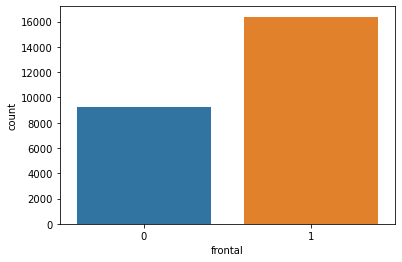

In [27]:
sns.countplot(data=airdf, x = 'frontal')
plt.show()

### Here, it can be observed that around 16000 crashes had a frontal impact (1 for frontal, 0 for non-frontal) ,while around 9000 crashes were non- frontal

### Plotting missing values :

<Figure size 720x432 with 0 Axes>

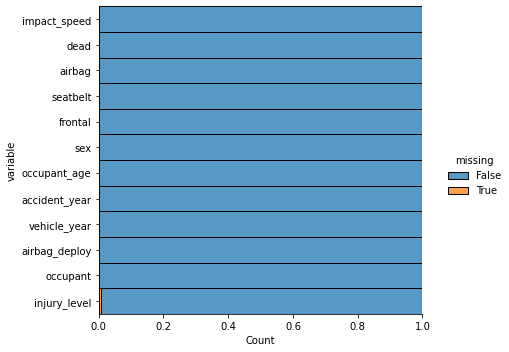

In [28]:
plt.figure(figsize=(10,6))
sns.displot(
    data=airdf.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)
plt.show()

## Count of unique values of airbag column : 

In [29]:
airdf['airbag'].value_counts()

airbag    14049
none      11574
Name: airbag, dtype: int64

## Visualization to see the number of casualties, that resulted in death or survived :

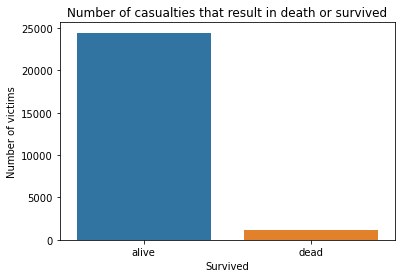

In [30]:
sns.countplot(data=airdf, x='dead')
plt.xlabel("Survived")
plt.ylabel("Number of victims")
plt.title("Number of casualties that result in death or survived")
plt.show()

### It is very obvious from the count plot displayed above, that major proportion of people survived the crash

In [31]:
airdf['impact_speed'].value_counts().sort_index()

1-9km/h      683
10-24      12452
25-39       8056
40-54       2947
55+         1485
Name: impact_speed, dtype: int64

## To check correlation :

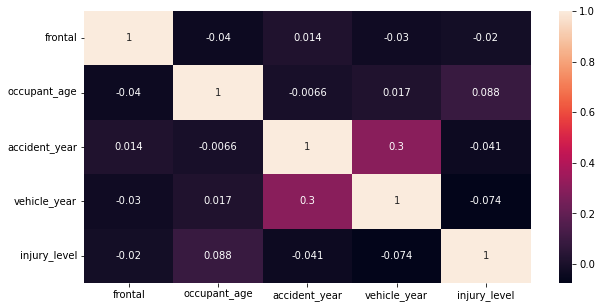

In [32]:
plt.figure(figsize=(10,5))
sns.heatmap(airdf.corr(),annot=True) 
plt.show()

### There is a weak positive correlation (0.3) between year of vehicle and whether the airbag was deployed or not.

# Number of accidents year wise :

In [33]:
airdf.groupby('accident_year').size()

accident_year
1997    3895
1998    4315
1999    4417
2000    4330
2001    4027
2002    4639
dtype: int64

## Number of deaths when seatbelt was worn and airbag was deployed during the accident

In [34]:
condition1 = airdf[(airdf['seatbelt'] == 'belted') & (airdf['airbag_deploy'] == 'deploy')]

In [35]:
condition1[condition1['dead'] == 'dead']

,impact_speed,dead,airbag,seatbelt,frontal,sex,occupant_age,accident_year,vehicle_year,airbag_deploy,occupant,injury_level
321,10-24,dead,airbag,belted,1,m,37,1997,1995.0,deploy,driver,4.0
492,25-39,dead,airbag,belted,0,f,63,1997,1995.0,deploy,pass,3.0
498,40-54,dead,airbag,belted,0,m,70,1997,1990.0,deploy,driver,4.0
546,55+,dead,airbag,belted,0,f,25,1997,1994.0,deploy,driver,4.0
827,25-39,dead,airbag,belted,0,m,26,1997,1994.0,deploy,driver,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
25674,55+,dead,airbag,belted,1,m,18,2002,2001.0,deploy,pass,4.0
25740,25-39,dead,airbag,belted,1,f,87,2002,1999.0,deploy,driver,4.0
25746,25-39,dead,airbag,belted,0,m,73,2002,1994.0,deploy,driver,4.0
25948,55+,dead,airbag,belted,0,m,86,2002,2002.0,deploy,driver,4.0


### 154 cases which resulted in death of occupant.

In [36]:
airdf['impact_speed'].unique()

array(['25-39', '10-24', '40-54', '55+', '1-9km/h'], dtype=object)

# Number of deaths when impact speed was 55+ :

In [37]:
airdf[(airdf['impact_speed'] == '55+') & (airdf['dead'] == 'dead')]

,impact_speed,dead,airbag,seatbelt,frontal,sex,occupant_age,accident_year,vehicle_year,airbag_deploy,occupant,injury_level
8,55+,dead,none,none,1,m,32,1997,1987.0,unavail,driver,4.0
83,55+,dead,none,belted,1,m,67,1997,1992.0,unavail,driver,4.0
84,55+,dead,none,belted,1,f,64,1997,1992.0,unavail,pass,4.0
265,55+,dead,none,none,1,m,23,1997,1986.0,unavail,driver,4.0
317,55+,dead,none,none,0,m,34,1997,1990.0,unavail,driver,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
25949,55+,dead,airbag,belted,0,f,86,2002,2002.0,deploy,pass,4.0
25952,55+,dead,none,belted,1,m,33,2002,1988.0,unavail,driver,4.0
25993,55+,dead,none,belted,0,m,26,2002,1991.0,unavail,driver,4.0
26081,55+,dead,none,none,0,f,58,2002,1986.0,unavail,driver,3.0


### 415 cases where impact speed was 55+ and resulted in death of occupant.

# Dataset 2 : Accident

In [38]:
accdf = pd.read_excel('Dataset/road-accident.xlsx')
accdf

,Number of Vehicles,Accident Date,Time (24hr),Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
0,1,2009-01-01,55,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,44,Car
1,1,2009-01-02,2335,Dry,Darkness: street lights present and lit,Fine without high winds,Driver,Serious,Female,23,Car
2,1,2009-01-02,1645,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Female,12,Car
3,1,2009-01-02,1723,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,15,Car
4,2,2009-01-02,1350,Dry,Daylight: street lights present,Fine without high winds,Driver,Slight,Female,34,Car
...,...,...,...,...,...,...,...,...,...,...,...
12985,2,2016-12-24,1325,Wet / Damp,Daylight: street lights present,Raining without high winds,Driver or rider,Slight,Female,43,Car
12986,2,2016-12-24,1325,Wet / Damp,Daylight: street lights present,Raining without high winds,Vehicle or pillion passenger,Slight,Male,15,Car
12987,2,2016-12-26,2304,Dry,Darkness: street lights present and lit,Fine without high winds,Vehicle or pillion passenger,Serious,Female,26,Taxi/Private hire car
12988,2,2016-12-26,2304,Dry,Darkness: street lights present and lit,Fine without high winds,Driver or rider,Serious,Male,66,Taxi/Private hire car


In [39]:
accdf.head()

,Number of Vehicles,Accident Date,Time (24hr),Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
0,1,2009-01-01,55,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,44,Car
1,1,2009-01-02,2335,Dry,Darkness: street lights present and lit,Fine without high winds,Driver,Serious,Female,23,Car
2,1,2009-01-02,1645,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Female,12,Car
3,1,2009-01-02,1723,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,15,Car
4,2,2009-01-02,1350,Dry,Daylight: street lights present,Fine without high winds,Driver,Slight,Female,34,Car


In [40]:
accdf.tail()

,Number of Vehicles,Accident Date,Time (24hr),Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
12985,2,2016-12-24,1325,Wet / Damp,Daylight: street lights present,Raining without high winds,Driver or rider,Slight,Female,43,Car
12986,2,2016-12-24,1325,Wet / Damp,Daylight: street lights present,Raining without high winds,Vehicle or pillion passenger,Slight,Male,15,Car
12987,2,2016-12-26,2304,Dry,Darkness: street lights present and lit,Fine without high winds,Vehicle or pillion passenger,Serious,Female,26,Taxi/Private hire car
12988,2,2016-12-26,2304,Dry,Darkness: street lights present and lit,Fine without high winds,Driver or rider,Serious,Male,66,Taxi/Private hire car
12989,4,2016-12-31,2346,Wet / Damp,Darkness: street lights present and lit,Raining without high winds,Driver or rider,Slight,Male,27,Car


In [41]:
accdf.shape

(12990, 11)

In [42]:
accdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12990 entries, 0 to 12989
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Number of Vehicles   12990 non-null  int64         
 1   Accident Date        12990 non-null  datetime64[ns]
 2   Time (24hr)          12990 non-null  int64         
 3   Road Surface         12990 non-null  object        
 4   Lighting Conditions  12990 non-null  object        
 5   Weather Conditions   12990 non-null  object        
 6   Casualty Class       12990 non-null  object        
 7   Casualty Severity    12990 non-null  object        
 8   Sex of Casualty      12990 non-null  object        
 9   Age of Casualty      12990 non-null  int64         
 10  Type of Vehicle      12990 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 1.1+ MB


In [43]:
accdf.isna().sum()

Number of Vehicles     0
Accident Date          0
Time (24hr)            0
Road Surface           0
Lighting Conditions    0
Weather Conditions     0
Casualty Class         0
Casualty Severity      0
Sex of Casualty        0
Age of Casualty        0
Type of Vehicle        0
dtype: int64

# Checking duplicated rows

In [44]:
accdf.duplicated().any()

True

In [45]:
accdf.duplicated().sum()

100

# Displaying duplicated rows

In [46]:
accdf[accdf.duplicated()]

,Number of Vehicles,Accident Date,Time (24hr),Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
572,1,2009-03-17,1800,Dry,Daylight: street lights present,Fine without high winds,Pedestrian,Slight,Female,12,Car
600,4,2009-03-19,1605,Dry,Daylight: street lights present,Fine without high winds,Driver,Slight,Male,38,Car
613,1,2009-03-21,505,Dry,Darkness: street lighting unknown,Fine without high winds,Passenger,Slight,Male,22,Other Vehicle
766,3,2009-04-11,1051,Dry,Daylight: street lights present,Fine without high winds,Driver,Slight,Female,45,Car
778,2,2009-04-12,1521,Dry,Daylight: street lights present,Fine without high winds,Passenger,Slight,Male,17,Car
...,...,...,...,...,...,...,...,...,...,...,...
12041,1,2015-05-01,1840,Dry,Daylight: street lights present,Fine without high winds,Vehicle or pillion passenger,Slight,Female,19,Car
12074,3,2015-05-21,1610,Dry,Daylight: street lights present,Fine without high winds,Vehicle or pillion passenger,Slight,Male,19,Car
12143,2,2015-06-27,2050,Dry,Darkness: street lights present and lit,Fine without high winds,Vehicle or pillion passenger,Serious,Male,19,Car
12145,2,2015-06-27,2050,Dry,Darkness: street lights present and lit,Fine without high winds,Vehicle or pillion passenger,Serious,Male,19,Car


# Dropping duplicated rows :

In [47]:
accdf.drop_duplicates(inplace=True)

In [48]:
accdf.shape

(12890, 11)

# Summary Statistics for Numeric Data :

In [49]:
accdf.describe()

,Number of Vehicles,Time (24hr),Age of Casualty
count,12890.000000,12890.000000,12890.000000
mean,1.932739,1397.197595,34.978743
std,0.859187,521.756764,18.235003
min,1.000000,0.000000,0.000000
25%,1.000000,1036.000000,21.000000
50%,2.000000,1450.000000,31.000000
75%,2.000000,1750.000000,46.000000
max,14.000000,2358.000000,98.000000


# Summary Statistics for object datatype :

In [50]:
accdf.describe(include=['O'])

,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Type of Vehicle
count,12890,12890,12890,12890,12890,12890,12890
unique,8,6,10,5,3,2,28
top,Dry,Daylight: street lights present,Fine without high winds,Driver,Slight,Male,Car
freq,9355,8874,11025,6440,11400,7625,8986


# Key Observations :

### Vehicle type which was involved the most during the crash was car and the class of the casuality was driver

In [51]:
accdf['Road Surface'].unique()

array(['Dry', 'Wet / Damp', 'Frost / Ice', 'Snow', 'Flood', 'Frost/ Ice',
       5, 'Flood (surface water over 3cm deep)'], dtype=object)

In [52]:
accdf['Lighting Conditions'].value_counts()

Daylight: street lights present              8874
Darkness: street lights present and lit      2772
Darkness: street lighting unknown            1006
Darkness: no street lighting                  214
Darkness: street lights present but unlit      15
5                                               9
Name: Lighting Conditions, dtype: int64

In [53]:
accdf['Weather Conditions'].value_counts()

Fine without high winds       11025
Raining without high winds     1213
Raining with high winds         172
Fine with high winds            137
Other                           110
Snowing without high winds      106
Unknown                          57
Fog or mist – if hazard          42
Fog or mist â€“ if hazard        17
Snowing with high winds          11
Name: Weather Conditions, dtype: int64

In [54]:
accdf['Weather Conditions'] = accdf['Weather Conditions'].str.replace('Fog or mist â€“ if hazard', 'Fog or mist – if hazard')

In [55]:
accdf['Weather Conditions'].value_counts()

Fine without high winds       11025
Raining without high winds     1213
Raining with high winds         172
Fine with high winds            137
Other                           110
Snowing without high winds      106
Fog or mist – if hazard          59
Unknown                          57
Snowing with high winds          11
Name: Weather Conditions, dtype: int64

In [56]:
accdf['Casualty Class'].value_counts()

Driver                          6440
Passenger                       3200
Pedestrian                      1833
Driver or rider                  999
Vehicle or pillion passenger     418
Name: Casualty Class, dtype: int64

In [57]:
accdf['Casualty Severity'].value_counts()

Slight     11400
Serious     1387
Fatal        103
Name: Casualty Severity, dtype: int64

In [58]:
accdf['Sex of Casualty'].value_counts()

Male      7625
Female    5265
Name: Sex of Casualty, dtype: int64

In [59]:
accdf['Type of Vehicle'].nunique()

28

In [60]:
accdf['Accident Year'] = pd.DatetimeIndex(accdf['Accident Date']).year

In [61]:
accdf['Age Group of Casualty'] = pd.cut(accdf['Age of Casualty'], bins = [0,2,17,65,99], labels=['Toddler','Child','Adult','Elderly'])

## Analysis Q 1

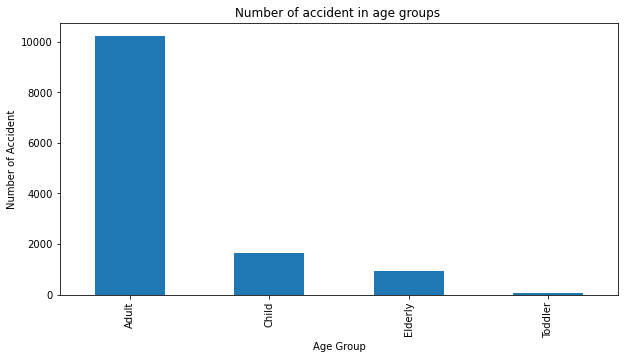

In [62]:
plt.figure(figsize=(10,5))

accdf['Age Group of Casualty'].value_counts().plot.bar()
plt.xlabel('Age Group')
plt.ylabel('Number of Accident')
plt.title('Number of accident in age groups ')
plt.show()

In [63]:
accdf.head(20)

,Number of Vehicles,Accident Date,Time (24hr),Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle,Accident Year,Age Group of Casualty
0,1,2009-01-01,55,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,44,Car,2009,Adult
1,1,2009-01-02,2335,Dry,Darkness: street lights present and lit,Fine without high winds,Driver,Serious,Female,23,Car,2009,Adult
2,1,2009-01-02,1645,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Female,12,Car,2009,Child
3,1,2009-01-02,1723,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,15,Car,2009,Child
4,2,2009-01-02,1350,Dry,Daylight: street lights present,Fine without high winds,Driver,Slight,Female,34,Car,2009,Adult
5,2,2009-01-02,1350,Dry,Daylight: street lights present,Fine without high winds,Driver,Slight,Male,25,Car,2009,Adult
6,2,2009-01-02,2300,Dry,Darkness: street lights present and lit,Fine without high winds,Driver,Slight,Male,57,Car,2009,Adult
7,1,2009-01-03,222,Dry,Darkness: street lights present and lit,Fine without high winds,Passenger,Slight,Male,17,Car,2009,Child
8,2,2009-01-03,325,Wet / Damp,Darkness: street lights present and lit,Fine without high winds,Passenger,Slight,Female,23,Car,2009,Adult
9,1,2009-01-03,1645,Wet / Damp,Darkness: no street lighting,Fine without high winds,Passenger,Slight,Male,20,Car,2009,Adult


In [64]:
accdf['Time (24hr)']

0          55
1        2335
2        1645
3        1723
4        1350
         ... 
12985    1325
12986    1325
12987    2304
12988    2304
12989    2346
Name: Time (24hr), Length: 12890, dtype: int64

In [65]:
accdf['Time (24hr)'].describe()

count    12890.000000
mean      1397.197595
std        521.756764
min          0.000000
25%       1036.000000
50%       1450.000000
75%       1750.000000
max       2358.000000
Name: Time (24hr), dtype: float64

In [66]:
accdf['Time Period'] = pd.cut(accdf['Time (24hr)'], bins = [0,600,1200,1800,2358], labels=['Midnight','Daytime','Noon','Night'])

In [67]:
accdf['Time Period']

0        Midnight
1           Night
2            Noon
3            Noon
4            Noon
           ...   
12985        Noon
12986        Noon
12987       Night
12988       Night
12989       Night
Name: Time Period, Length: 12890, dtype: category
Categories (4, object): ['Midnight' < 'Daytime' < 'Noon' < 'Night']

In [70]:
accdf

,Number of Vehicles,Accident Date,Time (24hr),Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle,Accident Year,Age Group of Casualty,Time Period
0,1,2009-01-01,55,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,44,Car,2009,Adult,Midnight
1,1,2009-01-02,2335,Dry,Darkness: street lights present and lit,Fine without high winds,Driver,Serious,Female,23,Car,2009,Adult,Night
2,1,2009-01-02,1645,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Female,12,Car,2009,Child,Noon
3,1,2009-01-02,1723,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,15,Car,2009,Child,Noon
4,2,2009-01-02,1350,Dry,Daylight: street lights present,Fine without high winds,Driver,Slight,Female,34,Car,2009,Adult,Noon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12985,2,2016-12-24,1325,Wet / Damp,Daylight: street lights present,Raining without high winds,Driver or rider,Slight,Female,43,Car,2016,Adult,Noon
12986,2,2016-12-24,1325,Wet / Damp,Daylight: street lights present,Raining without high winds,Vehicle or pillion passenger,Slight,Male,15,Car,2016,Child,Noon
12987,2,2016-12-26,2304,Dry,Darkness: street lights present and lit,Fine without high winds,Vehicle or pillion passenger,Serious,Female,26,Taxi/Private hire car,2016,Adult,Night
12988,2,2016-12-26,2304,Dry,Darkness: street lights present and lit,Fine without high winds,Driver or rider,Serious,Male,66,Taxi/Private hire car,2016,Elderly,Night


## Analysis Q 2 :

In [68]:
# SMALL_SIZE = 8
# MEDIUM_SIZE = 10
# BIGGER_SIZE = 12

# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=25)     # fontsize of the axes title
# plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=18)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('font', size=14)
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)
# plt.show()

<Figure size 1440x720 with 0 Axes>

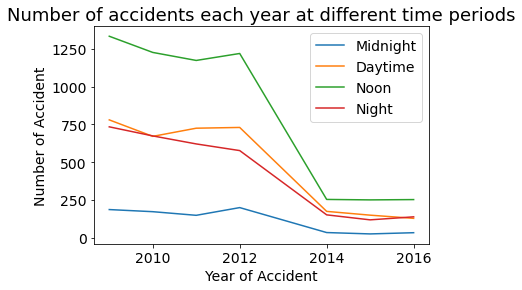

In [69]:
plt.figure(figsize=(20,10))

pd.DataFrame({
   'Midnight': accdf[accdf['Time Period'] == 'Midnight'].groupby('Accident Year')['Time Period'].count(),
   'Daytime': accdf[accdf['Time Period'] == 'Daytime'].groupby('Accident Year')['Time Period'].count(),
    'Noon': accdf[accdf['Time Period'] == 'Noon'].groupby('Accident Year')['Time Period'].count(),
    'Night': accdf[accdf['Time Period'] == 'Night'].groupby('Accident Year')['Time Period'].count()
   }, index = accdf['Accident Year'].unique()).plot.line()

plt.xlabel('Year of Accident')
plt.ylabel('Number of Accident')
plt.title('Number of accidents each year at different time periods')
plt.show()

# To check outliers :

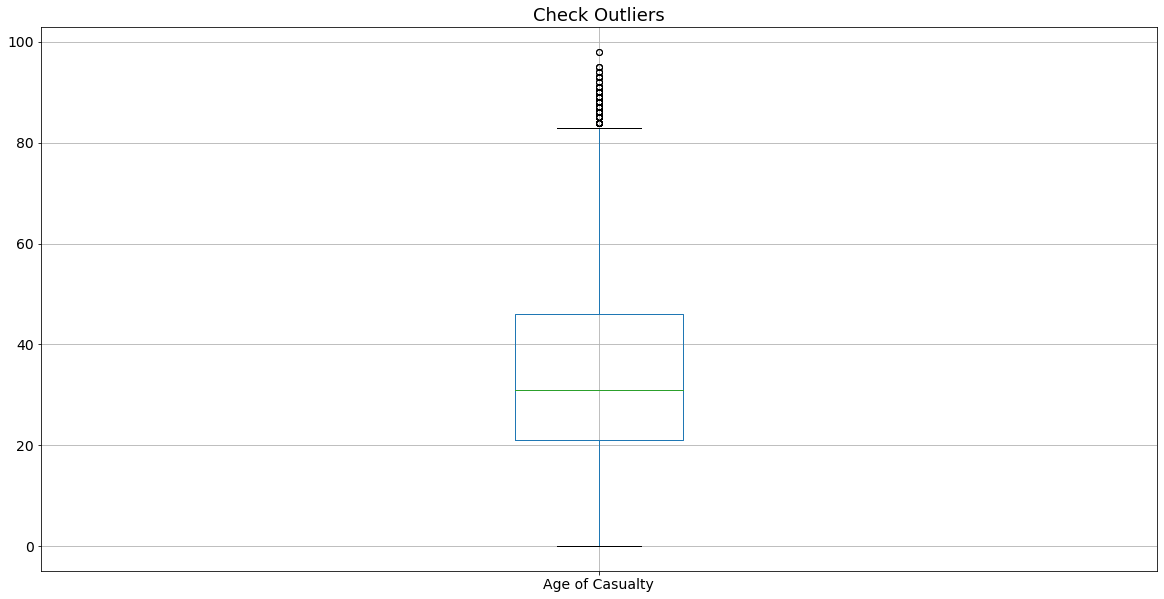

In [70]:
plt.figure(figsize=(20,10))
accdf.boxplot('Age of Casualty')
plt.title("Check Outliers")
plt.show()


In [71]:
accdf[accdf['Age of Casualty'] > 82]

,Number of Vehicles,Accident Date,Time (24hr),Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle,Accident Year,Age Group of Casualty,Time Period
16,2,2009-01-04,1605,Dry,Darkness: street lights present and lit,Fine without high winds,Driver,Slight,Male,83,Car,2009,Elderly,Noon
35,1,2009-01-06,1120,Dry,Daylight: street lights present,Fine without high winds,Pedestrian,Slight,Male,88,Car,2009,Elderly,Daytime
101,2,2009-01-17,1215,Wet / Damp,Daylight: street lights present,Fine without high winds,Driver,Slight,Male,90,Other Vehicle,2009,Elderly,Noon
119,2,2009-01-19,1154,Dry,Daylight: street lights present,Fine without high winds,Passenger,Slight,Female,84,Bus or coach (17 or more passenger seats),2009,Elderly,Daytime
156,1,2009-01-22,1540,Dry,Daylight: street lights present,Fine without high winds,Pedestrian,Slight,Female,86,Pedal cycle,2009,Elderly,Noon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12734,1,2016-06-28,1627,Dry,Daylight: street lights present,Fine without high winds,Pedestrian,Serious,Female,92,Car,2016,Elderly,Noon
12845,2,2016-09-06,1439,Dry,Daylight: street lights present,Fine without high winds,Driver or rider,Slight,Female,85,Car,2016,Elderly,Noon
12891,2,2016-10-15,1605,Dry,Daylight: street lights present,Fine without high winds,Driver or rider,Slight,Male,86,Car,2016,Elderly,Noon
12942,1,2016-11-29,1415,Dry,Daylight: street lights present,Fine without high winds,Driver or rider,Slight,Male,87,Car,2016,Elderly,Noon


# Displot to see the Distribution of Age of Casualty :

<Figure size 864x360 with 0 Axes>

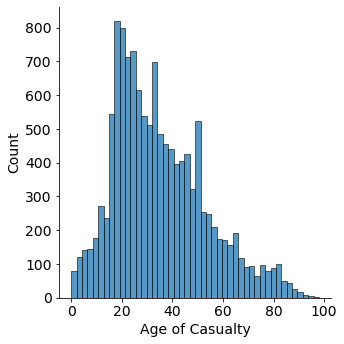

In [72]:
plt.figure(figsize = (12, 5))
sns.displot(accdf['Age of Casualty'])
plt.show()

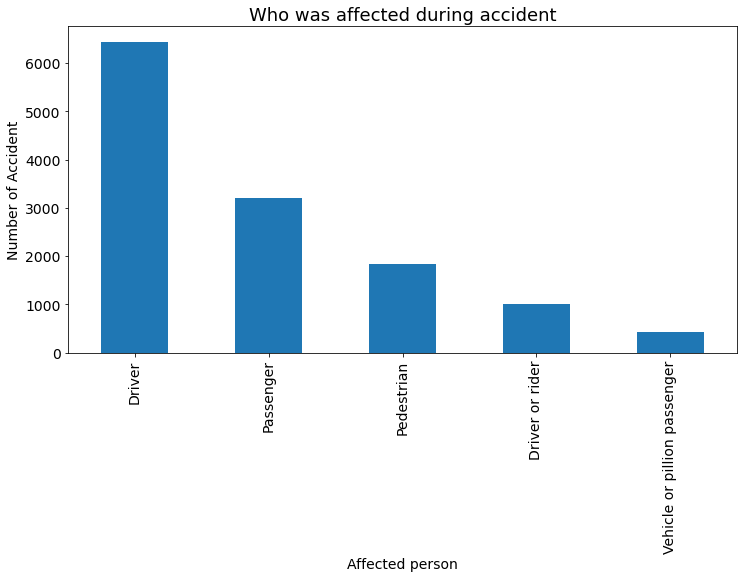

In [73]:
plt.figure(figsize=(12,6))
accdf['Casualty Class'].value_counts().plot.bar()
plt.xlabel('Affected person')
plt.ylabel('Number of Accident')
plt.title('Who was affected during accident')
plt.show()

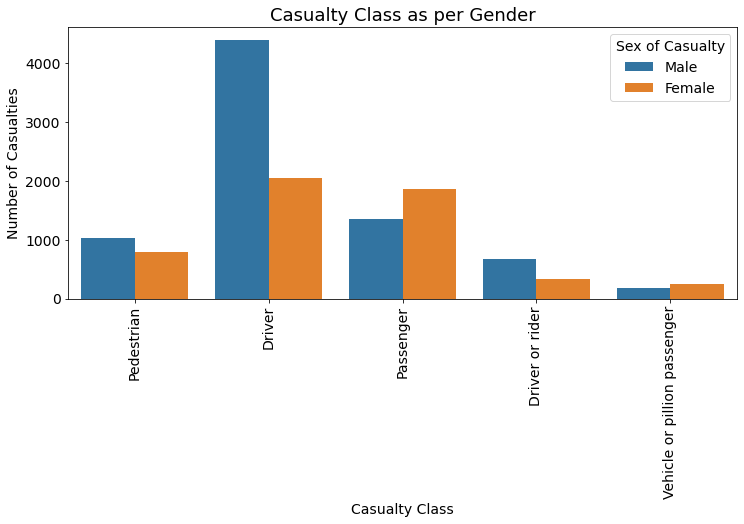

In [74]:
plt.figure(figsize=(12,5))
affected_person = sns.countplot(data = accdf, x = 'Casualty Class', hue = 'Sex of Casualty')
affected_person.tick_params(axis='x', rotation=90)
plt.xlabel('Casualty Class')
plt.ylabel('Number of Casualties')
plt.title('Casualty Class as per Gender')
plt.show()

## Analysis Q 3 : 

In [75]:
airdf['injury_level'].value_counts()

3.0    8334
0.0    6240
1.0    5460
2.0    4183
4.0    1118
5.0     133
6.0       2
Name: injury_level, dtype: int64

In [76]:
airdf['injury_level'] = airdf['injury_level'].replace({
    0 : 'no injury',
    1 : 'possible injury',
    2 : 'no incapacity',
    3 : 'incapacity',
    4 : 'killed',
    5 : 'unknown',
    6 : 'prior death'
})

In [77]:
airdf.head(10)

,impact_speed,dead,airbag,seatbelt,frontal,sex,occupant_age,accident_year,vehicle_year,airbag_deploy,occupant,injury_level
1,25-39,alive,none,belted,1,f,26,1997,1990.0,unavail,driver,incapacity
2,10-24,alive,airbag,belted,1,f,72,1997,1995.0,deploy,driver,possible injury
3,10-24,alive,none,none,1,f,69,1997,1988.0,unavail,driver,killed
4,25-39,alive,airbag,belted,1,f,53,1997,1995.0,deploy,driver,possible injury
5,25-39,alive,none,belted,1,f,32,1997,1988.0,unavail,driver,incapacity
6,40-54,alive,none,belted,1,f,22,1997,1985.0,unavail,driver,incapacity
7,55+,alive,none,belted,1,m,22,1997,1984.0,unavail,driver,incapacity
8,55+,dead,none,none,1,m,32,1997,1987.0,unavail,driver,killed
9,10-24,alive,none,belted,0,m,40,1997,1984.0,unavail,driver,possible injury
10,10-24,alive,none,belted,1,f,18,1997,1987.0,unavail,driver,no injury


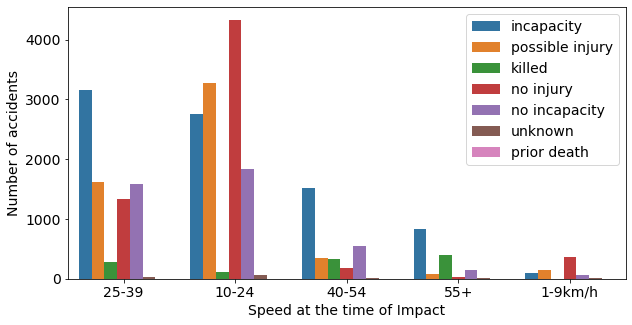

In [80]:
plt.figure(figsize=(10,5))

sns.countplot(x = 'impact_speed', hue = 'injury_level', data = airdf)
plt.xlabel('Speed at the time of Impact')
plt.ylabel('Number of accidents')
plt.legend(loc='upper right')
plt.show()